In [1]:
from PredictPerovskites import PredictABX3, PredictAABBXX6
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_scatter(column, table):
    
    figsize = (4.6, 3.5)
    s = 50
    marker = 'o'
    lw = 0
    color = 'blue'
    alpha = 0.2
    fontsize = 18
    ls = '--'
    axis_width = 1.5

    fig = plt.figure(figsize=figsize)

    plt.scatter(df[column].values, df['_'.join([column, 'check'])].values, s=s, marker=marker, lw=lw, color=color, alpha=alpha)
    cushion = 0.01 * (df[column].max() - df[column].min())
    xmin, xmax = df[column].min() * (1-cushion), df[column].max() * (1+cushion)
    ymin, ymax = xmin, xmax
    plt.plot([xmin, xmax], [ymin, ymax], color='black', ls=ls, lw=axis_width)
    plt.xlabel('%s from TableS%s.csv' % (column, table), fontsize=fontsize)
    plt.ylabel('%s generated here' % column, fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    return plt

In [3]:
# read in TableS1.csv which contains our experimental dataset and associated information
df = pd.read_csv('TableS1.csv')
# generate t using the current script
df['t_check'] = [PredictABX3(ABX3).t for ABX3 in df.ABX3.values]
# compare t generated here to t in TableS1.csv
df['t_diff'] = abs(df['t'] - df['t_check'])
print('The max difference for t = %.3f' % df.t_diff.max())

# generate tau using the current script
df['tau_check'] = [PredictABX3(ABX3).tau for ABX3 in df.ABX3.values]
# compare tau generated here to tau in TableS1.csv
df['tau_diff'] = abs(df['tau'] - df['tau_check'])
print('The max difference for tau = %.3f' % df.tau_diff.max())

# fit calibrated classifier for tau
clf = PredictABX3('').calibrate_tau

# generate tau  probabilities using the current script
df['tau_prob_check'] = [PredictABX3(ABX3).tau_prob(clf) for ABX3 in df.ABX3.values]
# compare tau probabilities generated here to those in TableS1.csv
df['tau_prob_diff'] = abs(df['tau_prob'] - df['tau_prob_check'])
print('The max difference for tau probabilities = %.3f' % df.tau_prob_diff.max())
print('Note probabilities can vary slightly due to variation in CV splits')

The max difference for t = 0.005
The max difference for tau = 0.005
The max difference for tau probabilities = 0.027
Note probabilities can vary slightly due to variation in CV splits


<module 'matplotlib.pyplot' from 'C:\\Users\\Chris\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

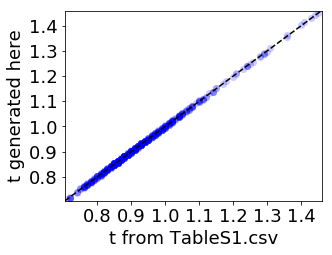

In [4]:
plot_scatter('t', '1')

<module 'matplotlib.pyplot' from 'C:\\Users\\Chris\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

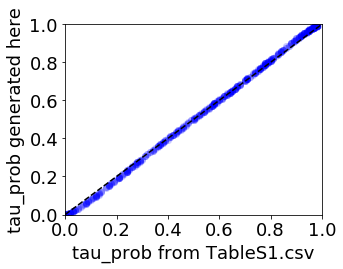

In [5]:
plot_scatter('tau_prob', '1')

In [6]:
# read in TableS2.csv which contains our experimental dataset and associated information
df = pd.read_csv('TableS2.csv')
df['A1'] = df['A']
df['A2'] = df['A']
df['B1'] = df['B1']
df['X1'] = df['X']
df['X2'] = df['X']

# generate t using the current script  
df['t_check'] = [PredictAABBXX6(df.A1.values[idx], 
                                df.A2.values[idx],
                                df.B1.values[idx],
                                df.B2.values[idx],
                                df.X1.values[idx],
                                df.X2.values[idx]).t for idx in range(len(df))]
## compare t generated here to t in TableS1.csv
df['t_diff'] = abs(df['t'] - df['t_check'])
print('The max difference for t = %.3f' % df.t_diff.max())

# generate t using the current script  
df['tau_check'] = [PredictAABBXX6(df.A1.values[idx], 
                                df.A2.values[idx],
                                df.B1.values[idx],
                                df.B2.values[idx],
                                df.X1.values[idx],
                                df.X2.values[idx]).tau for idx in range(len(df))]
## compare t generated here to t in TableS1.csv
df['tau_diff'] = abs(df['tau'] - df['tau_check'])
print('The max difference for tau = %.3f' % df.tau_diff.max())
#
# fit calibrated classifier for tau
clf = PredictAABBXX6(df.A1.values[0], 
                                df.A2.values[0],
                                df.B1.values[0],
                                df.B2.values[0],
                                df.X1.values[0],
                                df.X2.values[0]).calibrate_tau

# generate tau  probabilities using the current script
df['tau_prob_check'] = [PredictAABBXX6(df.A1.values[idx], 
                                df.A2.values[idx],
                                df.B1.values[idx],
                                df.B2.values[idx],
                                df.X1.values[idx],
                                df.X2.values[idx]).tau_prob(clf) for idx in range(len(df))]
# compare tau probabilities generated here to those in TableS1.csv
df['tau_prob_diff'] = abs(df['tau_prob'] - df['tau_prob_check'])
print('The max difference for tau probabilities = %.3f' % df.tau_prob_diff.max())
print('Note probabilities can vary slightly due to variation in CV splits')

The max difference for t = 0.005
The max difference for tau = 0.005
The max difference for tau probabilities = 0.005
Note probabilities can vary slightly due to variation in CV splits


<module 'matplotlib.pyplot' from 'C:\\Users\\Chris\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

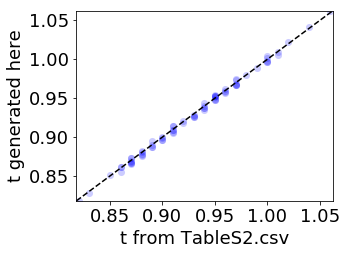

In [7]:
plot_scatter('t', '2')

<module 'matplotlib.pyplot' from 'C:\\Users\\Chris\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

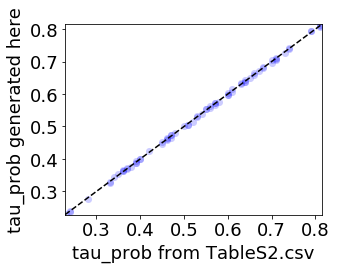

In [8]:
plot_scatter('tau_prob', '2')

In [9]:
# read in TableS3.csv which contains our experimental dataset and associated information
df = pd.read_csv('TableS3.csv')

df['compound'] = [cmpd.replace('MA2', 'Ma2') for cmpd in df['compound'].values]
df['A'] = [A if A != 'MA' else 'Ma' for A in df.A.values]

df['A1'] = df['A']
df['A2'] = df['A']
df['B1'] = df['B1']
df['X1'] = df['X']
df['X2'] = df['X']

# generate t using the current script  
df['t_check'] = [PredictAABBXX6(df.A1.values[idx], 
                                df.A2.values[idx],
                                df.B1.values[idx],
                                df.B2.values[idx],
                                df.X1.values[idx],
                                df.X2.values[idx]).t for idx in range(len(df))]
## compare t generated here to t in TableS1.csv
df['t_diff'] = abs(df['t'] - df['t_check'])
print('The max difference for t = %.3f' % df.t_diff.max())

# generate t using the current script  
df['tau_check'] = [PredictAABBXX6(df.A1.values[idx], 
                                df.A2.values[idx],
                                df.B1.values[idx],
                                df.B2.values[idx],
                                df.X1.values[idx],
                                df.X2.values[idx]).tau for idx in range(len(df))]
## compare t generated here to t in TableS1.csv
df['tau_diff'] = abs(df['tau'] - df['tau_check'])
print('The max difference for tau = %.3f' % df.tau_diff.max())
#
# fit calibrated classifier for tau
clf = PredictAABBXX6(df.A1.values[0], 
                                df.A2.values[0],
                                df.B1.values[0],
                                df.B2.values[0],
                                df.X1.values[0],
                                df.X2.values[0]).calibrate_tau

# generate tau  probabilities using the current script
df['tau_prob_check'] = [PredictAABBXX6(df.A1.values[idx], 
                                df.A2.values[idx],
                                df.B1.values[idx],
                                df.B2.values[idx],
                                df.X1.values[idx],
                                df.X2.values[idx]).tau_prob(clf) for idx in range(len(df))]
# compare tau probabilities generated here to those in TableS1.csv
df['tau_prob_diff'] = abs(df['tau_prob'] - df['tau_prob_check'])
print('The max difference for tau probabilities = %.3f' % df.tau_prob_diff.max())
print('Note probabilities can vary slightly due to variation in CV splits')

The max difference for t = 0.005
The max difference for tau = 0.005
The max difference for tau probabilities = 0.005
Note probabilities can vary slightly due to variation in CV splits


<module 'matplotlib.pyplot' from 'C:\\Users\\Chris\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

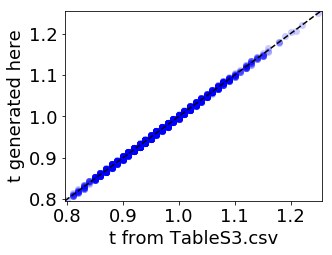

In [10]:
plot_scatter('t', '3')

<module 'matplotlib.pyplot' from 'C:\\Users\\Chris\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

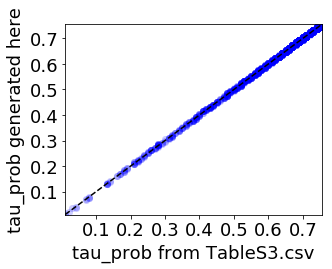

In [11]:
plot_scatter('tau_prob', '3')